# 3.1 Modèle sous SciKit

## Préparation
Importation des librairies
Importation du dataset

In [177]:
#Importation des librairies
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_curve, auc, recall_score
import warnings
warnings.filterwarnings('ignore')

In [178]:
df_logisticReg = pd.read_pickle('./Datasets/complete_dataset_one_hot_with_scaling.pkl')
df_logisticReg

,Attrition,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,...,PerformanceRating_Excellent,EnvironmentSatisfaction_Moyen,EnvironmentSatisfaction_Très élevé,EnvironmentSatisfaction_Élevé,JobSatisfaction_Moyen,JobSatisfaction_Très élevé,JobSatisfaction_Élevé,WorkLifeBalance_Mauvais,WorkLifeBalance_Satisfaisant,WorkLifeBalance_Très satisfaisant
0,0,-0.393608,1.404934,-0.678721,-1.150723,-0.932212,-1.321970,2.485416,-0.980966,-0.679016,...,1,0,0,1,0,1,0,0,1,0
1,1,0.100215,-0.491658,-1.079751,2.129051,0.241773,-0.678839,0.156362,-0.327532,-0.368619,...,0,0,0,1,1,0,0,0,0,0
2,0,0.964405,2.724709,-0.678721,-0.057465,2.589744,-0.807466,-0.619989,-0.327532,-0.679016,...,1,1,0,0,1,0,0,1,0,0
3,0,-0.887430,0.386209,0.123338,-1.150723,2.589744,0.221544,1.709065,0.162543,1.493766,...,1,0,1,0,0,1,0,0,0,1
4,0,0.100215,-0.884064,0.524367,-0.877408,1.415759,-0.292961,-0.619989,-0.164174,-0.679016,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4404,0,-0.640519,-0.629754,-0.678721,0.762479,-0.932212,-0.678839,-0.619989,-0.164174,-0.368619,...,1,0,0,1,0,1,0,0,0,1
4405,0,-0.517063,-0.100739,0.123338,0.489164,0.241773,-0.164335,1.709065,-0.654249,-0.679016,...,1,0,1,0,0,0,0,0,0,1
4406,0,-0.887430,-0.812466,-0.277692,-0.057465,-0.932212,-0.164335,-0.619989,-0.654249,-0.679016,...,1,0,1,0,0,1,0,0,0,1
4407,0,1.952050,-0.595124,-1.079751,1.309108,-0.932212,-0.807466,0.932714,-0.490890,-0.368619,...,0,0,0,0,0,0,1,0,0,1


Séparation du dataset en deux jeux de train et test

In [179]:
X = df_logisticReg.drop('Attrition', axis=1)
y = df_logisticReg['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Matrice de corrélation

In [180]:
# Fonction de génération de graphiques de corrélation
def plot_correlation_map( df, Size=25 ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( Size , Size ) )
    triangle_mask = np.triu(np.ones_like(corr, dtype=bool))
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr,
        cmap = cmap,
        square=True,
        cbar_kws={ 'shrink' : .9 },
        ax=ax,
        mask=triangle_mask,
        annot = True,
        annot_kws = { 'fontsize' : 2 }
    )


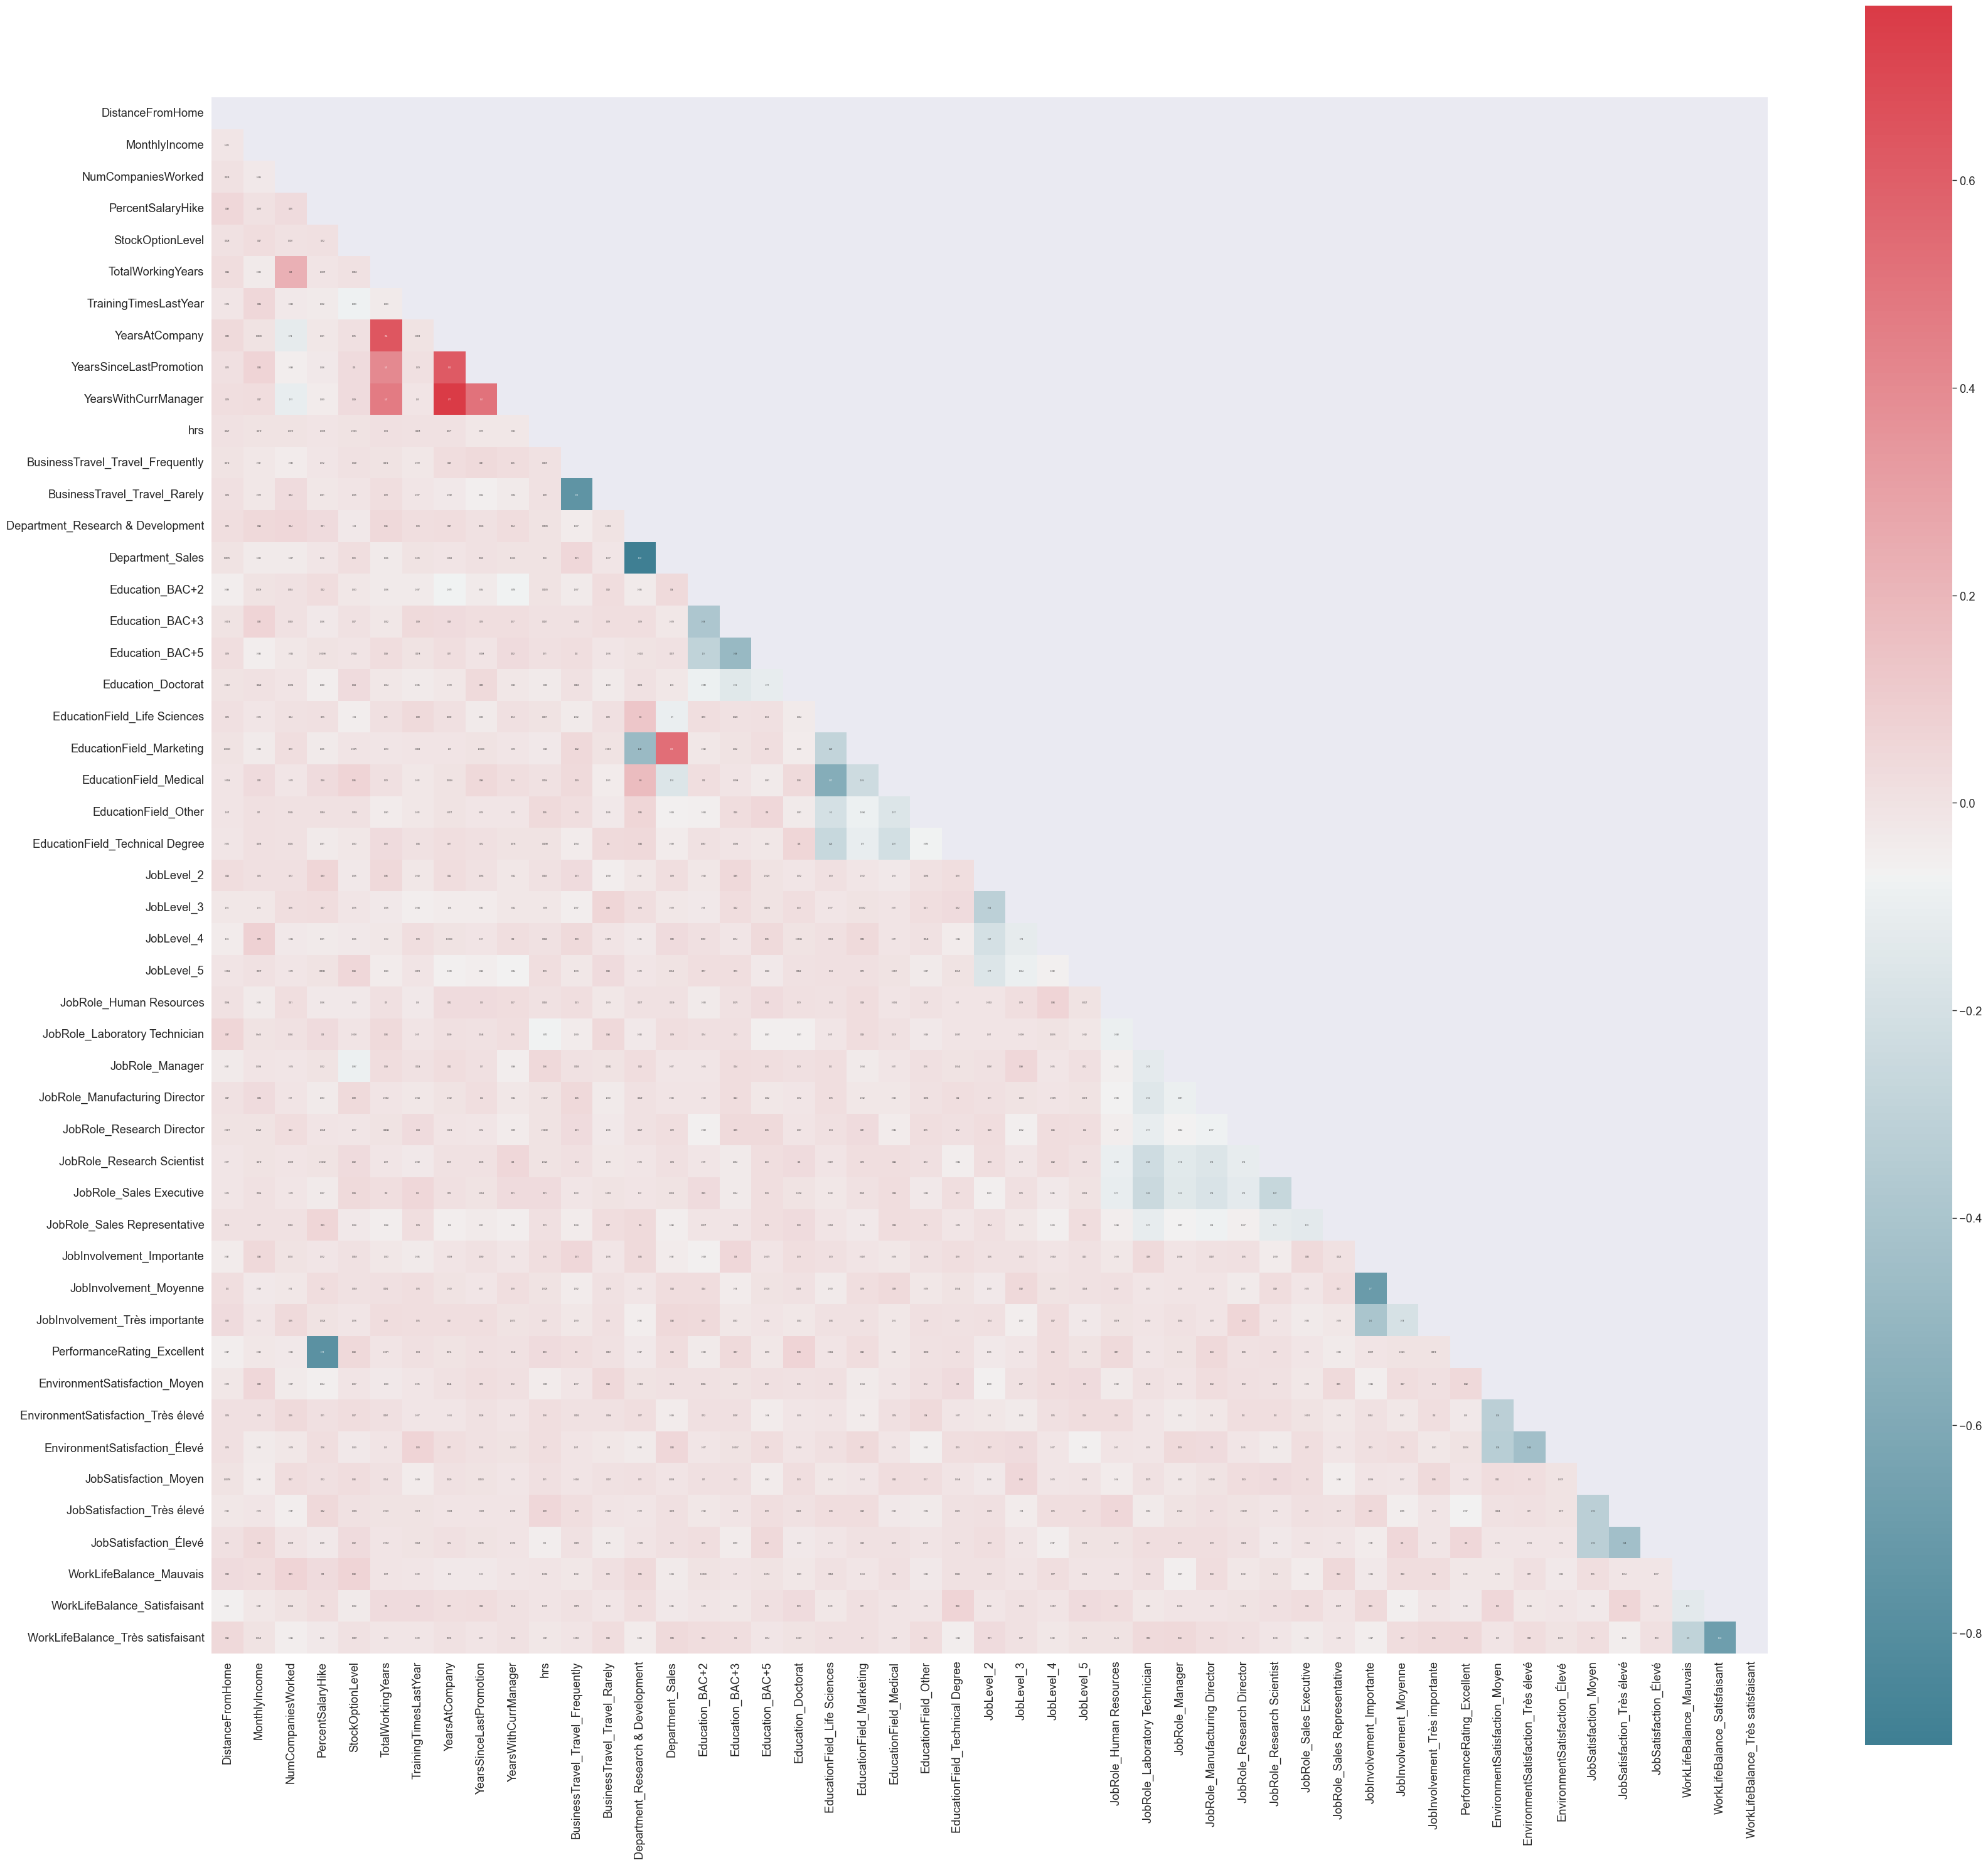

In [181]:
    plot_correlation_map(X_train,40)

In [191]:
#entrainement du modèle
logisticRegr = LogisticRegression(random_state=42, solver='liblinear', penalty='l1', class_weight="balanced", C=1)
logisticRegr.fit(X_train, y_train)

#prédictions sur le set d'entrainement
y_pred_train = logisticRegr.predict(X_train)

#calcul des indicateurs de performance
lraccuracy = accuracy_score(y_train, y_pred_train)
fpr, tpr, thresholds = roc_curve(y_train, y_pred_train)
lrroc_auc = auc(fpr, tpr)
lrf1_score = f1_score(y_train, y_pred_train)
lrrecall = recall_score(y_train, y_pred_train)
print('Model Accuracy: ', lraccuracy)
print('ROC_AUC Score: ', lrroc_auc)
print('F1 Score: ', lrf1_score)
print('Recall Score: ', lrrecall)

Model Accuracy:  0.6986107173235044
ROC_AUC Score:  0.707477504885155
F1 Score:  0.44023170089520797
Recall Score:  0.7206896551724138


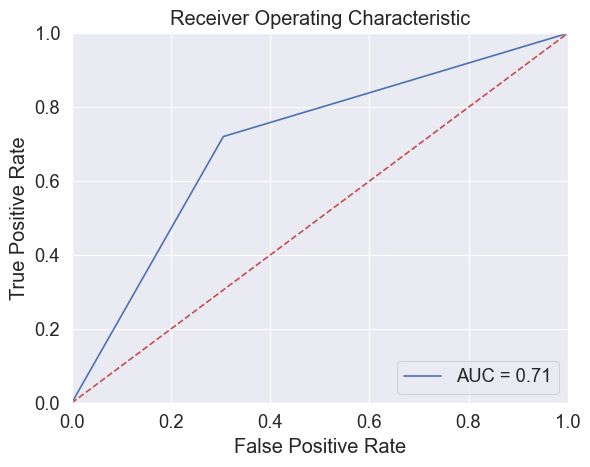

In [192]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % lrroc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

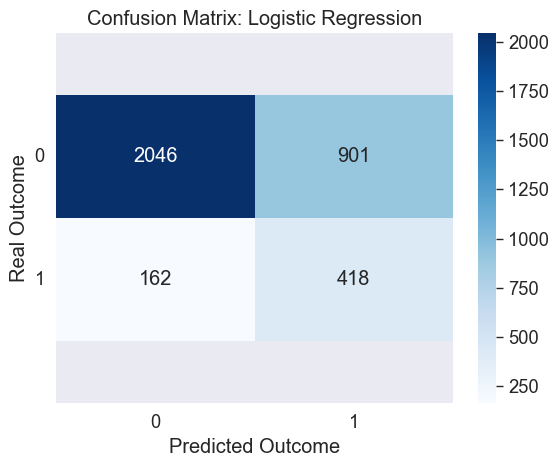

In [184]:
#affichage de la matrice de confusion pour le modèle d'entrainement
sns.set(context="paper", font_scale=1.5)
lrcm = confusion_matrix(y_train, y_pred_train)

ax = heatmap = sns.heatmap(lrcm, cmap="Blues", annot= True,fmt=".0f")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix: Logistic Regression')
plt.ylabel('Real Outcome')
plt.xlabel('Predicted Outcome')
plt.yticks(rotation=0)
plt.show()